# Preliminary Project - Data Analysis and Visualization
**Group Members:**
- Benjamin Francis Abadila
- Angelo Dela Paz
- Carl Mitzchel Padua
- Edjin Jerney Payumo
- Levin Jacob Sta. Cruz

---
## Setup

In [364]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [365]:
# 2023 Dataset
fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\708551984.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


---
## Data Preprocessing

### Simple Data Inspection

In [366]:
#show all columns on output
pd.set_option('display.max_columns', None)

In [367]:
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

`'TOTDIS'` is the only object datatype although it should also be numerical 

In [368]:
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00
mean,9.34,45.67,81634.50,4574.49,4.14,149526.83,28721.10,178247.93,1678.62,24227.86,16255.67,2087.70,261.07,8917.41,927.95,334.38,3147.78,6229.32,13496.45,2298.99,4626.74,387.41,25443.89,2398.01,6584.37,5824.78,367.30,375.80,61811.91,8.17,27286.06,16053.26,14394.01,6144.20,1712.81,4601.02,7037.53,2141.60,4130.66,711.64,2217.82,122.74,438.27,1900.27,1187.45,79.54,1279.17,1983.71,67.00,19.45,1.17,90158.87,11548.75,101707.62,4900.74,54093.33,3653.57,28019.67,89.43,31762.66,6315.29,6971.79,15813.11,7888.64,1988.34,8203.00,6376.15,9065.43,5097.81,6275.71,4889.74,27434.21,218.15,141447.73,332147.28,243155.35,10105.74,342253.02,573.17,168.31,691.46,1.52,95302.56,5.19,5.49,5.56,5.48,5.49,9.71
std,4.75,24.76,47131.56,2482.17,1.97,238460.01,69040.34,249486.30,12392.73,85935.70,29912.19,24827.38,3388.96,60552.16,67510.70,5839.10,6381.12,21557.90,44600.68,40097.95,29852.07,5000.56,225106.39,35315.79,34679.95,82371.68,16729.14,18022.39,266040.51,738.98,12875.67,13694.00,10333.80,6312.40,1549.35,4226.02,5509.89,2031.42,6184.10,1149.47,2066.75,518.25,1170.88,2127.92,1353.82,550.26,2686.72,4540.87,489.89,226.29,68.12,44941.10,19540.10,54935.16,7662.09,59331.42,17902.43,41437.42,6836.89,44227.33,15752.41,26318.06,21239.39,8947.52,9025.93,24212.81,17194.19,10490.74,36984.98,13899.96,26595.90,175215.73,2617.35,158238.92,406065.14,195625.70,109044.32,440624.86,678.97,163.52,783.89,0.50,158543.18,2.90,2.89,2.87,2.87,2.89,4.96
min,1.00,1.00,1.00,100.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-39955.00,-136448.00,-9000.00,-1200.00,-29500.00,-2000.00,-16600.00,-48770.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3593.50,0.00,1770.00,0.00,0.00,0.00,100.00,118.00,0.00,0.00,0.00,0.00,0.00,0.00,64.00,0.00,0.00,0.00,0.00,0.00,5292.00,14030.00,13967.00,0.00,14030.00,1.00,1.02,0.92,1.00,5240.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5.00,24.00,40817.75,2402.00,3.00,0.00,0.00,28080.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18347.00,6740.00,7500.00,2792.00,960.00,2000.00,3807.88,985.00,1670.00,90.00,901.00,0.00,0.00,390.00,378.00,0.00,0.00,0.00,0.00,0.00,0.00,60165.75,500.00,64920.00,

In [369]:
# Identify column that are non-numeric
fies_23.describe(include='O')

,TOTDIS
count,163268
unique,144056
top,
freq,7732


In [370]:
# Convert the TOTDIS column to string for inspection
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Check for null values
null_values_count = fies_23['TOTDIS'].isnull().sum()

# Identify non-numerical entries (including whitespace)
non_numerical_entries = fies_23[~fies_23['TOTDIS'].str.replace('.', '', regex=False).str.isnumeric()]

# Display results
print(f"Number of null values: {null_values_count}")
print(f"Number of non-numerical entries: {len(non_numerical_entries)}")

# Display the non-numerical entries for inspection
print(non_numerical_entries[['TOTDIS']])


Number of null values: 0
Number of non-numerical entries: 7732
             TOTDIS
47648              
47649              
47650              
47651              
47652              
...             ...
148931             
148932             
148933             
148934             
148935             

[7732 rows x 1 columns]


In [371]:
# Strip whitespace from the TOTAL_DISBURSEMENTS column
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify and view rows where TOTAL_DISBURSEMENTS contains only whitespace
whitespace_entries = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Display the rows with whitespace in TOTAL_DISBURSEMENTS
whitespace_entries['TOTDIS']


47648                
47649                
47650                
47651                
47652                
             ...     
148931               
148932               
148933               
148934               
148935               
Name: TOTDIS, Length: 7732, dtype: object

All the non-numeric values of column `'TOTDIS'` are whitespaces, probably caused by an encoding error

In [372]:
# Calculating the Missing Values % Contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)
df_null[df_null > 0] # Show only columns having Missing Values (non-zero)

Series([], dtype: float64)

There are no identified null values except for the empty whitespaces in `'TOTDIS'`

In [373]:
fies_23.shape

(163268, 90)

In [374]:
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [375]:
fies_23

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.50,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.00,0,0,0,0,0,0,0,0,0,0,0,0,18830.00,57120.00,46820.00,2540.00,1734.00,2410.00,8000.00,1835.00,2244.00,0.00,2250.00,0.00,0.00,1950.00,1820.00,0.00,0.00,0.00,0.00,0,0,147553.00,14000.00,161553.00,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.00,607070.00,228942.00,228942.0,0,607070.00,2,88.54,229.39,2,242828.00,10,10,10,10,10,1
1,1,28,2,2800,6.00,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.00,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.00,50206.00,43405.00,12500.00,2340.00,4710.00,12115.00,1230.00,2930.00,702.00,5025.00,0.00,960.00,5850.00,6162.00,0.00,1950.00,0.00,0.00,0,0,184458.00,12800.00,197258.00,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.00,411980.00,363077.00,363677.0,0,411980.00,2,88.54,550.54,2,68663.34,5,5,2,2,5,1
2,1,28,3,2800,3.50,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.00,0,0,0,0,0,0,0,0,0,0,0,0,27770.00,54160.00,36440.00,11955.00,2364.00,5360.00,13805.00,1470.00,2580.00,0.00,1860.00,0.00,0.00,3900.00,3120.00,0.00,0.00,0.00,0.00,0,0,164784.00,11500.00,176284.00,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.00,818212.00,516477.00,559186.0,0,818212.00,2,88.54,321.15,2,233774.86,10,10,10,10,10,1
3,1,28,4,2800,2.50,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.00,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.00,21220.00,20380.00,10490.00,1836.00,2780.00,8240.00,1060.00,1586.00,552.00,1910.00,0.00,0.00,2550.00,1820.00,0.00,0.00,0.00,0.00,0,0,92696.00,10000.00,102696.00,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.00,258538.00,180438.00,180438.0,0,258538.00,2,88.54,229.39,2,103415.20,7,8,5,5,8,1
4,1,28,5,2800,3.00,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.00,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.00,64250.00,45770.00,3320.00,1056.00,2020.00,7145.00,1150.00,2140.00,552.00,2130.00,0.00,0.00,3900.00,2730.00,0.00,0.00,0.00,0.00,0,0,163183.00,8000.00,171183.00,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.00,550724.00,390438.00,436962.0,2000,552724.00,2,88.54,275.27,2,183574.67,9,10,9,9,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163263,17,59,163264,5900,3.00,42600,5984,48584,0,0,8700,0,0,0,0,0,4780,300.00,30280,0,11340,0,0,0,0,0,0,0,41620,0,16815.00,8650.00,8969.00,3260.00,1040.00,2030.00,3530.00,2990.00,2360.00,204.00,1560.00,0.00,3744.00,1690.00,450.00,0.00,0.00,0.00,0.00,0,0,57292.00,3800.00,61092.00,4695,21300,0,12000,0,12000,3365,60,9600,2500,1050,260,0,4809,0,1000,600,0,0,49239.00,115984.00,110331.00,110331.0,0,115984.00,326,52.36,159.71,2,38661.33,2,3,4,4,3,17
163264,17,59,163265,5900,7.00,117600,56800,174400,0,0,0,0,0,0,0,0,4290,0.00,0,0,62630,0,0,0,0,0,0,0,62630,0,34916.00,20015.0

### Data Cleaning

In [376]:
# Convert TOTDIS to string to check for whitespaces
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify rows where TOTDIS contains only whitespace
whitespace_rows = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Compute the new values for TOTDIS
fies_23.loc[whitespace_rows.index, 'TOTDIS'] = (
    fies_23.loc[whitespace_rows.index, 'TOTEX'] + 
    fies_23.loc[whitespace_rows.index, 'OTHER_DISBURSEMENT']
)

# Convert TOTDIS back to numeric type
fies_23['TOTDIS'] = pd.to_numeric(fies_23['TOTDIS'], errors='coerce')

# Display the updated DataFrame for verification
print(fies_23[['TOTDIS', 'TOTEX', 'OTHER_DISBURSEMENT']].head())

     TOTDIS     TOTEX  OTHER_DISBURSEMENT
0 228942.00 228942.00                   0
1 363677.00 363077.00                 600
2 559186.00 516477.00               42709
3 180438.00 180438.00                   0
4 436962.00 390438.00               46524


In [377]:
# Dropping Unnecessary Columns
cleaned_fies = fies_23.copy()

# Drop Entrepreneurial Activity Component Columns
cleaned_fies.drop(columns=[
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10'
], inplace=True)

# Drop Food Component Columns
cleaned_fies.drop(columns=[
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 
    'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 
    'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 
    'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
    'FOOD_HOME', 'FOOD_OUTSIDE'
], inplace=True)

# Drop Non-Food Component Columns
cleaned_fies.drop(columns=[
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 
    'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 
    'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 
    'OTHER_EXPENDITURE'
], inplace=True)

# Drop Other Unnecessary Columns
cleaned_fies.drop(columns=[
    'WAGES', 'FOOD_ACCOM_SRVC', 'NPCINC', 
    'RPCINC', 'PRPCINC', 'PPCINC', 'RPCINC_NIR', 
    'W_REGN_NIR'
], inplace=True)


In [378]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'EAINC',
       'LOSSES', 'FOOD', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL',
       'OTHER_DISBURSEMENT', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'OTHREC',
       'TOREC', 'RPSU', 'RFACT', 'MEM_RFACT', 'URB', 'PERCAPITA'],
      dtype='object')

In [379]:
# Standardize Column Names
cleaned_fies.rename(
    columns={
        "W_REGN": "REGION",
        "W_PROV": "PROVINCE",
        "SEQ_NO": "FAMILY_ID",
        "RPROV": "PROVINCE_RECODE",
        "FSIZE": "FAMILY_SIZE",
        "NETSHARE": "NET_SHARE",
        "OTHER_SOURCE": "OTHER_INCOME_SOURCE",
        "REGFT": "GIFT_RECEIPTS",
        "EAINC": "ENTREP_INCOME",
        "LOSSES": "ENTREP_LOSS",
        "FOOD": "FOOD_EXPENSES",
        "NFOOD": "NON_FOOD_EXPENSES",
        "TOINC": "TOTAL_INCOME",
        "TOTEX": "TOTAL_EXPENSES",
        "TOTDIS": "TOTAL_DISBURSEMENTS",
        "OTHREC": "OTHER_RECEIPTS",
        "TOREC": "TOTAL_RECEIPTS",
        "RFACT": "FAMILY_WEIGHT",
        "MEM_RFACT": "POPULATION_WEIGHT",
        "URB": "AREA_CLASS",
        "PERCAPITA": "PCAPITA_INCOME",
    },
    inplace=True,
)

In [380]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'PROVINCE_RECODE', 'FAMILY_SIZE',
       'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'ENTREP_LOSS', 'FOOD_EXPENSES', 'ACTRENT', 'IMPUTED_RENT',
       'BIMPUTED_RENT', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'RPSU', 'FAMILY_WEIGHT',
       'POPULATION_WEIGHT', 'AREA_CLASS', 'PCAPITA_INCOME'],
      dtype='object')

In [381]:
cleaned_fies.shape

(163268, 36)

In [382]:
cleaned_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               163268 non-null  int64  
 1   PROVINCE             163268 non-null  int64  
 2   FAMILY_ID            163268 non-null  int64  
 3   PROVINCE_RECODE      163268 non-null  int64  
 4   FAMILY_SIZE          163268 non-null  float64
 5   REG_SAL              163268 non-null  int64  
 6   SEASON_SAL           163268 non-null  int64  
 7   NET_SHARE            163268 non-null  int64  
 8   CASH_ABROAD          163268 non-null  int64  
 9   CASH_DOMESTIC        163268 non-null  int64  
 10  RENTALS_REC          163268 non-null  int64  
 11  INTEREST             163268 non-null  int64  
 12  PENSION              163268 non-null  int64  
 13  DIVIDENDS            163268 non-null  int64  
 14  OTHER_INCOME_SOURCE  163268 non-null  int64  
 15  NET_RECEIPT      

### Data Engineering

In [383]:
poverty_threshold = 13873 * 12  # Official poverty threshold (Annual)

def classify_income(row):
    total_income = row['TOTAL_INCOME']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

cleaned_fies['SOCIAL_CLASS'] = cleaned_fies.apply(classify_income, axis=1)
print(cleaned_fies[['TOTAL_INCOME', 'SOCIAL_CLASS']].head())


   TOTAL_INCOME         SOCIAL_CLASS
0     607070.00  Lower-middle income
1     411980.00  Lower-middle income
2     818212.00        Middle income
3     258538.00           Low income
4     550724.00  Lower-middle income


In [384]:
cleaned_fies['NET_SAVINGS'] = cleaned_fies['TOTAL_INCOME'] - cleaned_fies['TOTAL_EXPENSES']

In [385]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'PROVINCE_RECODE', 'FAMILY_SIZE',
       'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'ENTREP_LOSS', 'FOOD_EXPENSES', 'ACTRENT', 'IMPUTED_RENT',
       'BIMPUTED_RENT', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'RPSU', 'FAMILY_WEIGHT',
       'POPULATION_WEIGHT', 'AREA_CLASS', 'PCAPITA_INCOME', 'SOCIAL_CLASS',
       'NET_SAVINGS'],
      dtype='object')

In [387]:
def remove_outliers(df, column, group_by):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each group
    Q1 = df.groupby(group_by)[column].quantile(0.25)
    Q3 = df.groupby(group_by)[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    def is_not_outlier(row):
        return lower_bound[row[group_by]] <= row[column] <= upper_bound[row[group_by]]
    
    return df[df.apply(is_not_outlier, axis=1)]

# Remove outliers for Income, Expense, and Savings
cleaned_fies = remove_outliers(cleaned_fies, 'TOTAL_INCOME', 'SOCIAL_CLASS')
cleaned_fies = remove_outliers(cleaned_fies, 'TOTAL_EXPENSES', 'SOCIAL_CLASS')
cleaned_fies = remove_outliers(cleaned_fies, 'NET_SAVINGS', 'SOCIAL_CLASS')

In [388]:
cleaned_fies.describe()

,REGION,PROVINCE,FAMILY_ID,PROVINCE_RECODE,FAMILY_SIZE,REG_SAL,SEASON_SAL,NET_SHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_INCOME_SOURCE,NET_RECEIPT,GIFT_RECEIPTS,ENTREP_INCOME,ENTREP_LOSS,FOOD_EXPENSES,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,AREA_CLASS,PCAPITA_INCOME,NET_SAVINGS
count,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00,157950.00
mean,9.35,45.78,81665.66,4584.95,4.14,149476.50,28563.83,1647.48,23991.36,16191.71,2004.86,257.33,8766.25,664.15,326.45,3144.32,6166.69,59836.71,6.52,101722.54,3624.57,27755.02,85.83,31465.42,25950.47,139134.17,328792.66,240856.71,266807.17,8334.66,337127.33,571.84,168.04,691.82,1.52,94004.00,87935.96
std,4.75,24.75,47145.14,2480.63,1.97,231540.11,54419.01,12238.31,85525.83,29594.42,23522.70,3370.90,60362.40,36496.55,5533.92,6373.60,21000.94,140478.36,533.55,54191.85,17618.34,38543.15,6684.81,41405.79,106847.27,144110.07,309206.54,182175.04,245559.52,86911.92,329955.37,677.67,163.53,785.31,0.50,111648.20,166076.75
min,1.00,1.00,2.00,100.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3593.50,0.00,0.00,0.00,100.00,0.00,5292.00,34400.00,20748.00,20748.00,0.00,34400.00,1.00,1.02,0.92,1.00,5240.00,-139634.00
25%,5.00,24.00,40816.25,2402.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,65317.00,0.00,9000.00,0.00,10500.00,0.00,59175.25,163068.00,132330.61,136530.06,0.00,166757.50,153.00,70.58,232.48,1.00,42171.62,14486.00
50%,10.00,46.00,81743.50,4600.00,4.00,72000.00,0.00,0.00,0.00,6300.00,0.00,0.00,0.00,0.00,0.00,510.00,1959.00,17800.00,0.00,90118.50,0.00,18000.00,0.00,21000.00,0.00,97348.00,239898.00,191632.00,200728.50,0.00,245536.00,355.00,114.38,445.07,2.00,65203.17,42228.07
75%,13.00,70.00,122417.75,7000.00,5.00,202440.00,42615.00,0.00,2000.00,21000.00,0.00,0.00,0.00,0.00,0.00,4000.00,5650.00,80278.75,0.00,124929.88,0.00,36000.00,0.00,39000.00,12600.00,167668.00,388927.50,291511.75,313351.50,1000.00,396387.50,698.00,191.13,816.50,2.00,108592.08,101557.00
max,17.00,98.00,163268.00,9900.00,23.50,6000000.00,3000000.00,1200000.00,4500000.00,2000000.00,3900000.00,350000.00,5100000.00,6600000.00,800000.00,300000.00,2667530.00,6410000.00,136448.00,1363779.00,2100000.00,2400000.00,2400000.00,2400000.00,5600000.00,3731087.00,7511500.00,3987659.00,7472324.00,26440000.00,29056890.00,5189.00,3539.15,16137.33,2.00,7511500.00,5480674.00


## Preliminary Analysis

In [363]:
# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)

# Getting descriptive statistics for the NET_SAVINGS column
cleaned_fies['NET_SAVINGS'].describe()

count    156762.00
mean      87677.37
std      162940.75
min     -132072.00
25%       14475.62
50%       41963.75
75%      101115.74
max     5218213.00
Name: NET_SAVINGS, dtype: float64

`NET_SAVINGS` has a minimum value of -5174102.00

In [347]:
# Assuming cleaned_fies is your DataFrame
# Sort the DataFrame by NET_SAVINGS in descending order
sorted_fies = cleaned_fies.sort_values(by='NET_SAVINGS', ascending=False)

# Display the top 10 rows of the sorted DataFrame
sorted_fies.head(10)


,REGION,PROVINCE,FAMILY_ID,PROVINCE_RECODE,FAMILY_SIZE,REG_SAL,SEASON_SAL,NET_SHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_INCOME_SOURCE,NET_RECEIPT,GIFT_RECEIPTS,ENTREP_INCOME,ENTREP_LOSS,FOOD_EXPENSES,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,AREA_CLASS,PCAPITA_INCOME,SOCIAL_CLASS,NET_SAVINGS
115065,13,75,115066,7502,2.00,0,0,0,0,0,0,0,90000,0,0,0,0.00,6410000,0,213706.00,0,300000,0,300000,5240000,1105620.00,6800000.00,1319326.00,6559326.00,2300,6802300.00,348,66.02,133.25,1,3400000.00,4,5480674.00
44110,6,4,44111,400,4.00,270120,0,0,0,0,0,0,0,0,0,0,49800.00,5718800,0,182124.00,0,360000,0,360000,5400000,739119.00,6398720.00,921243.00,6321243.00,0,6398720.00,204,147.09,576.17,1,1599680.00,4,5477477.00
72503,8,78,72504,7800,6.00,1806296,0,37150,4160000,0,0,0,0,0,0,2280,3070.00,0,0,147069.90,60000,0,0,60000,4300000,428119.00,6008796.00,575188.90,4875188.90,0,6008796.00,172,21.44,126.93,2,1001466.00,4,5433607.10
26409,4,10,26410,1000,4.50,0,0,0,0,63200,0,0,13200,6600000,0,0,50000.00,0,0,343098.00,0,378000,0,378000,5000000,1420554.00,7104400.00,1763652.00,6763652.00,0,7104400.00,1584,453.74,2067.43,2,1578755.50,4,5340748.00
6187,2,9,6188,900,3.00,0,0,0,0,0,0,0,0,0,0,0,905.00,5646400,0,126787.00,0,72000,0,72000,2500000,318592.00,5719305.00,445379.00,2945379.00,0,5719305.00,8,5.98,18.42,1,1906435.00,4,5273926.00
8091,2,15,8092,1500,8.00,290000,0,400000,0,0,0,0,0,7300,0,190,0.00,5720608,0,358128.00,0,42000,0,42000,4500000,883757.00,6460098.00,1241885.00,5741885.00,0,6460098.00,826,169.86,1441.40,1,807512.25,4,5218213.00
23989,3,71,23990,7100,1.00,690000,0,0,120000,0,360000,0,0,0,0,0,1310.00,4270000,0,115427.00,0,69000,0,69000,4123366,282466.00,5510310.00,397893.00,4521259.00,0,5510310.00,512,129.82,125.35,2,5510310.00,4,5112417.00
125627,13,76,125628,7607,2.00,0,0,0,0,6000,0,0,60000,0,0,0,1477.00,5390684,0,199177.20,0,111000,0,111000,600000,409866.00,5569161.00,609043.20,1209043.20,0,5569161.00,795,151.10,272.27,1,2784580.50,4,4960117.80
75677,9,73,75678,7300,2.50,0,0,0,0,0,0,0,305000,0,0,0,0.00,5854700,0,297340.00,0,300000,0,300000,460000,1562800.00,6459700.00,1860140.00,2320140.00,92000,6551700.00,11,177.77,487.38,1,2583880.00,4,4599560.00
120843,13,76,120844,7602,2.00,6000000,0,0,0,0,0,0,0,0,0,0,0.00,0,0,313777.00,660000,0,0,660000,3600000,1177542.00,6000000.00,1491319.00,5091319.00,0,6000000.00,554,354.85,667.03,1,3000000.00,4,4508681.00


## Preliminary Visualization

In [348]:
# Assuming you have your social class counts in a DataFrame
social_class_order = [
    "Poor",
    "Low income",
    "Lower-middle income",
    "Middle income",
    "Upper-middle income",
    "Upper income",
    "Rich",
]

# Count the occurrences of each social class
social_class_counts = (
    cleaned_fies["SOCIAL_CLASS"].value_counts().reindex(social_class_order)
)

### Target Variable

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\561216763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


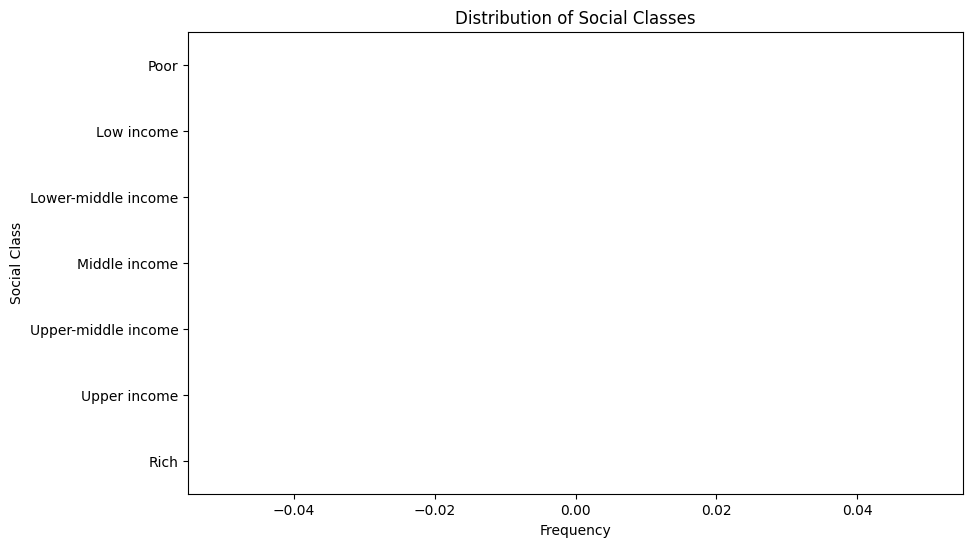

In [349]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title('Distribution of Social Classes')
plt.xlabel('Frequency')
plt.ylabel('Social Class')
plt.show()

>**Analysis**:
Majority of the households in PH are part of the low income and poor classes, indicating prevalence of poverty and other issues such as income inequality

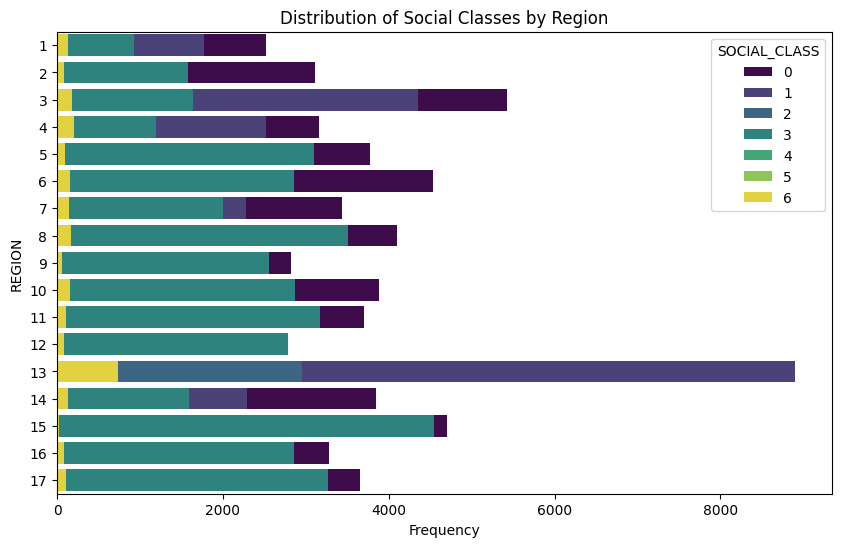

In [350]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 6))
sns.countplot(
    y="REGION",
    data=cleaned_fies,
    hue="SOCIAL_CLASS",
    palette="viridis",
    hue_order=social_class_order,
    order=sorted(cleaned_fies["REGION"].unique()),
    dodge=False
)
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

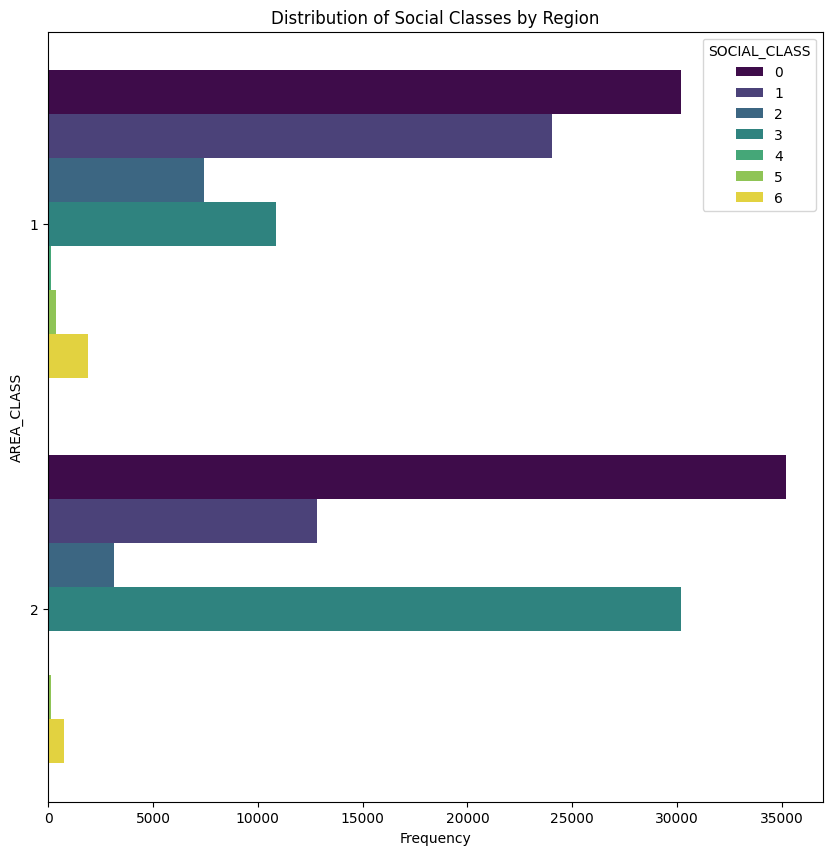

In [351]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 10))
sns.countplot(y="AREA_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", hue_order=social_class_order, palette="viridis")
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\155791291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

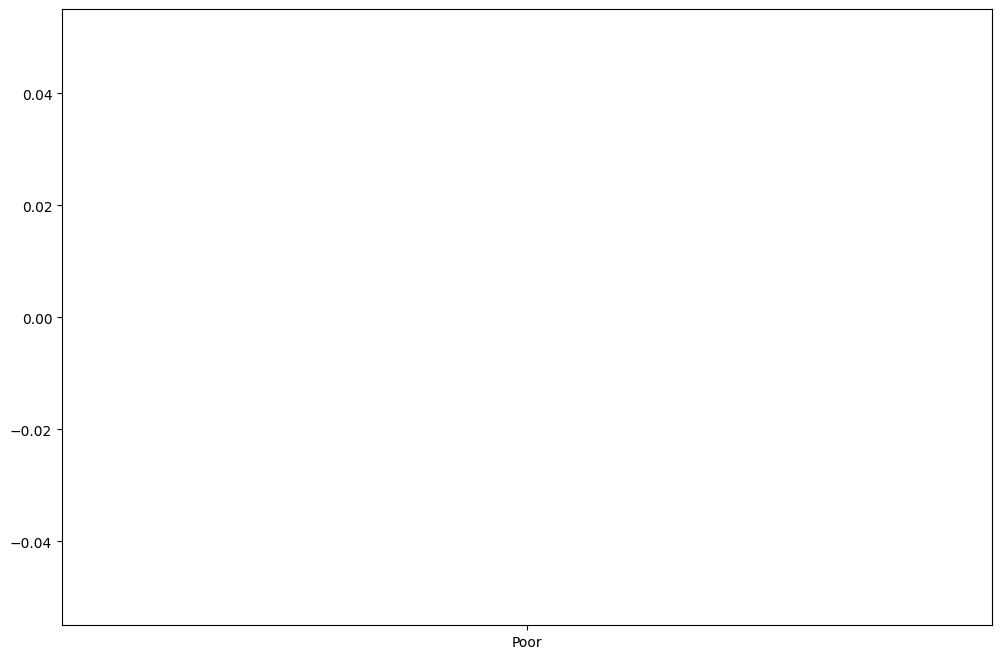

In [355]:
# Graph for Total Income by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS",
    y=cleaned_fies["TOTAL_INCOME"],
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title('Total Income by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Total Income')
plt.show()

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\3830563331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

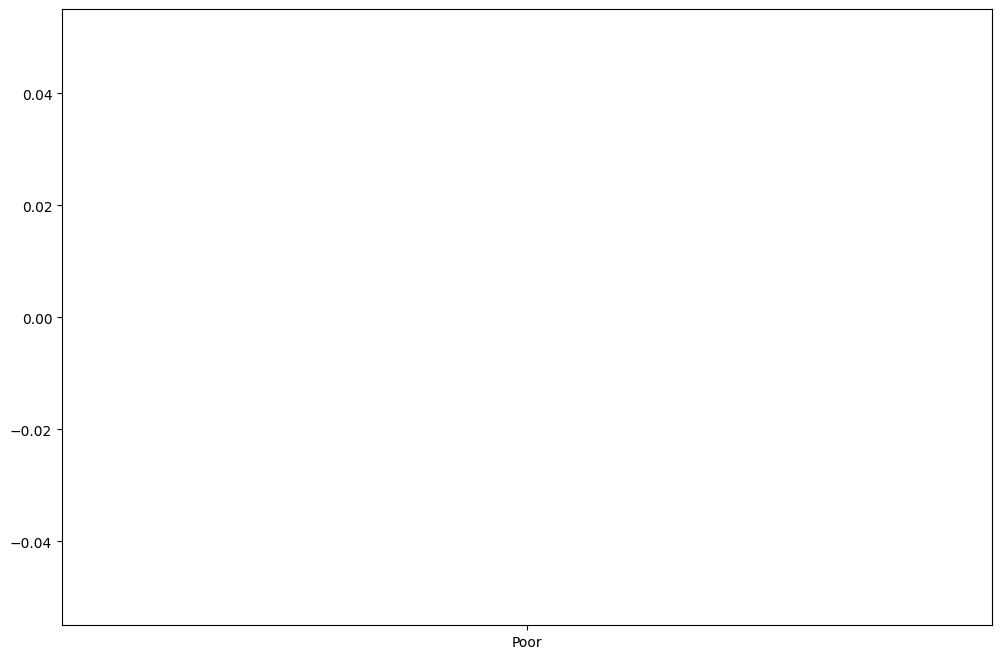

In [356]:
# Graph for Total Expenses by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS", y=np.log(cleaned_fies["TOTAL_EXPENSES"]), data=cleaned_fies, palette="viridis", order=social_class_order
)
plt.title('Total Log Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Log of Total Expenses')
plt.show()


c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\3522320908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


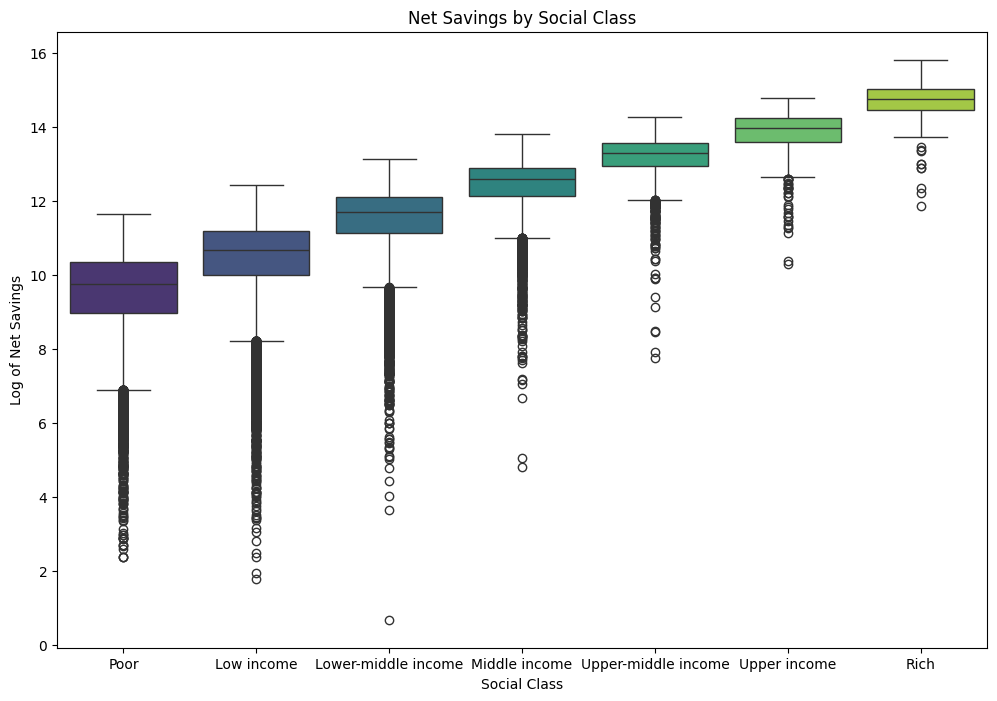

In [335]:
# Graph for Net Savings by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS", y=np.log(cleaned_fies["NET_SAVINGS"]), data=cleaned_fies, palette="viridis", order=social_class_order
)
plt.title('Net Savings by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Log of Net Savings')
plt.show()

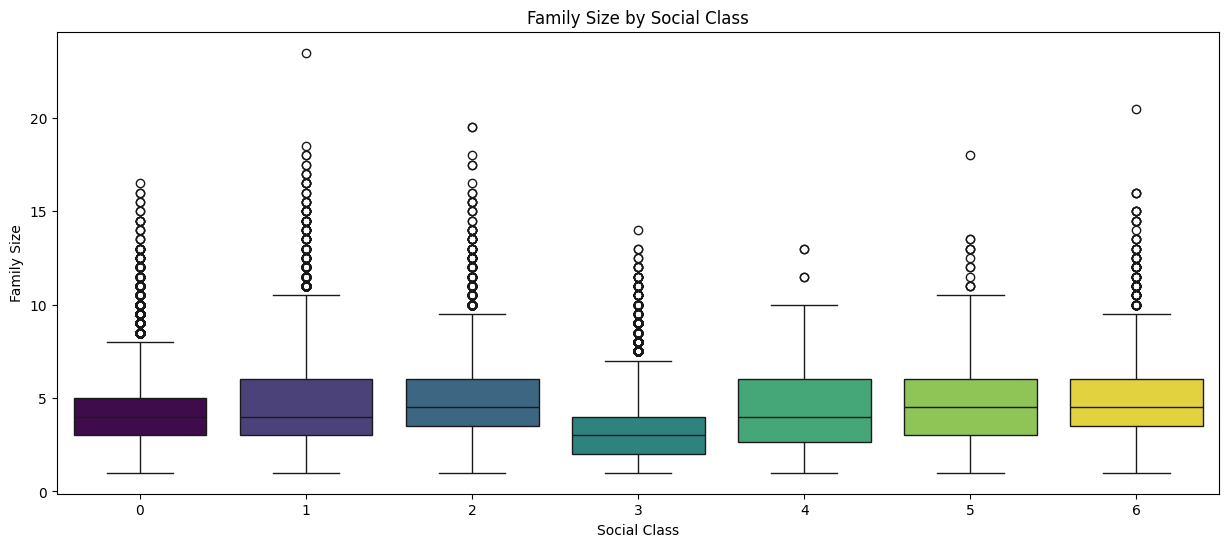

In [357]:
# Graph for Family Size by Social Class
plt.figure(figsize=(15, 6))
sns.boxplot(
    y="FAMILY_SIZE", x="SOCIAL_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", palette="viridis", legend=False, hue_order=social_class_order
)

plt.title('Family Size by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Family Size')
plt.show()


Insights: `FAMILY_SIZE` does not change significantly throughout all `SOCIAL_CLASS`

### Demographic Visualization

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\507316250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="REGION", data=cleaned_fies, palette="viridis")


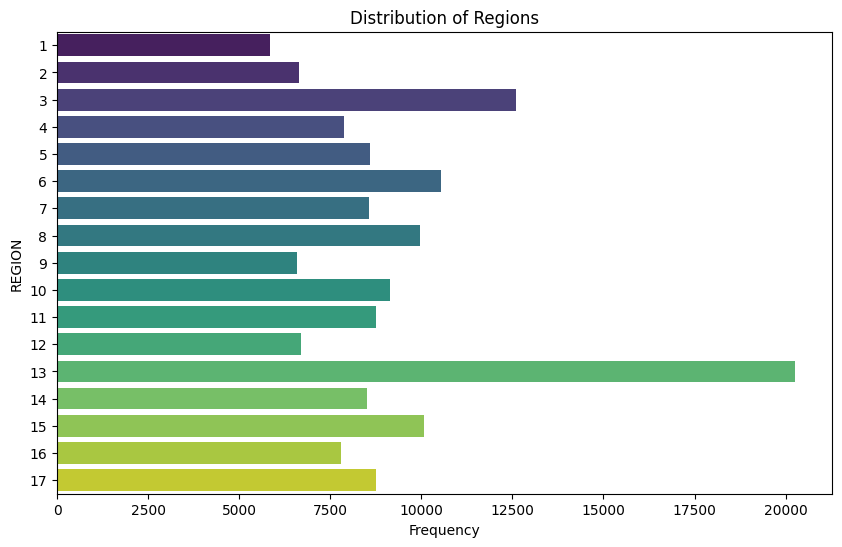

In [358]:
# Distribution of Regions
plt.figure(figsize=(10, 6))
sns.countplot(y="REGION", data=cleaned_fies, palette="viridis")
plt.title("Distribution of Regions")
plt.xlabel("Frequency")
plt.show()

Insights: 

NCR has the most number of families, followed by REGION 3, REGION 6, REGION 15, REGION 8

Region 1 has the least

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\190536609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="REGION", y="NET_SAVINGS", data=cleaned_fies, palette="viridis")


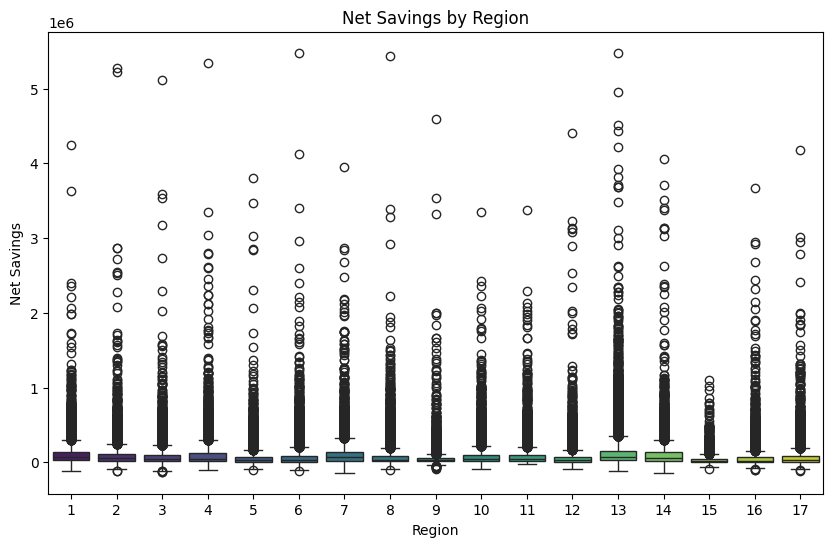

In [389]:
# Savings by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x="REGION", y="NET_SAVINGS", data=cleaned_fies, palette="viridis")
plt.title("Net Savings by Region")
plt.xlabel("Region")
plt.ylabel("Net Savings")
plt.show()


### Analysis for Modelling

In [339]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode SOCIAL_CLASS
cleaned_fies['SOCIAL_CLASS'] = label_encoder.fit_transform(cleaned_fies['SOCIAL_CLASS'])


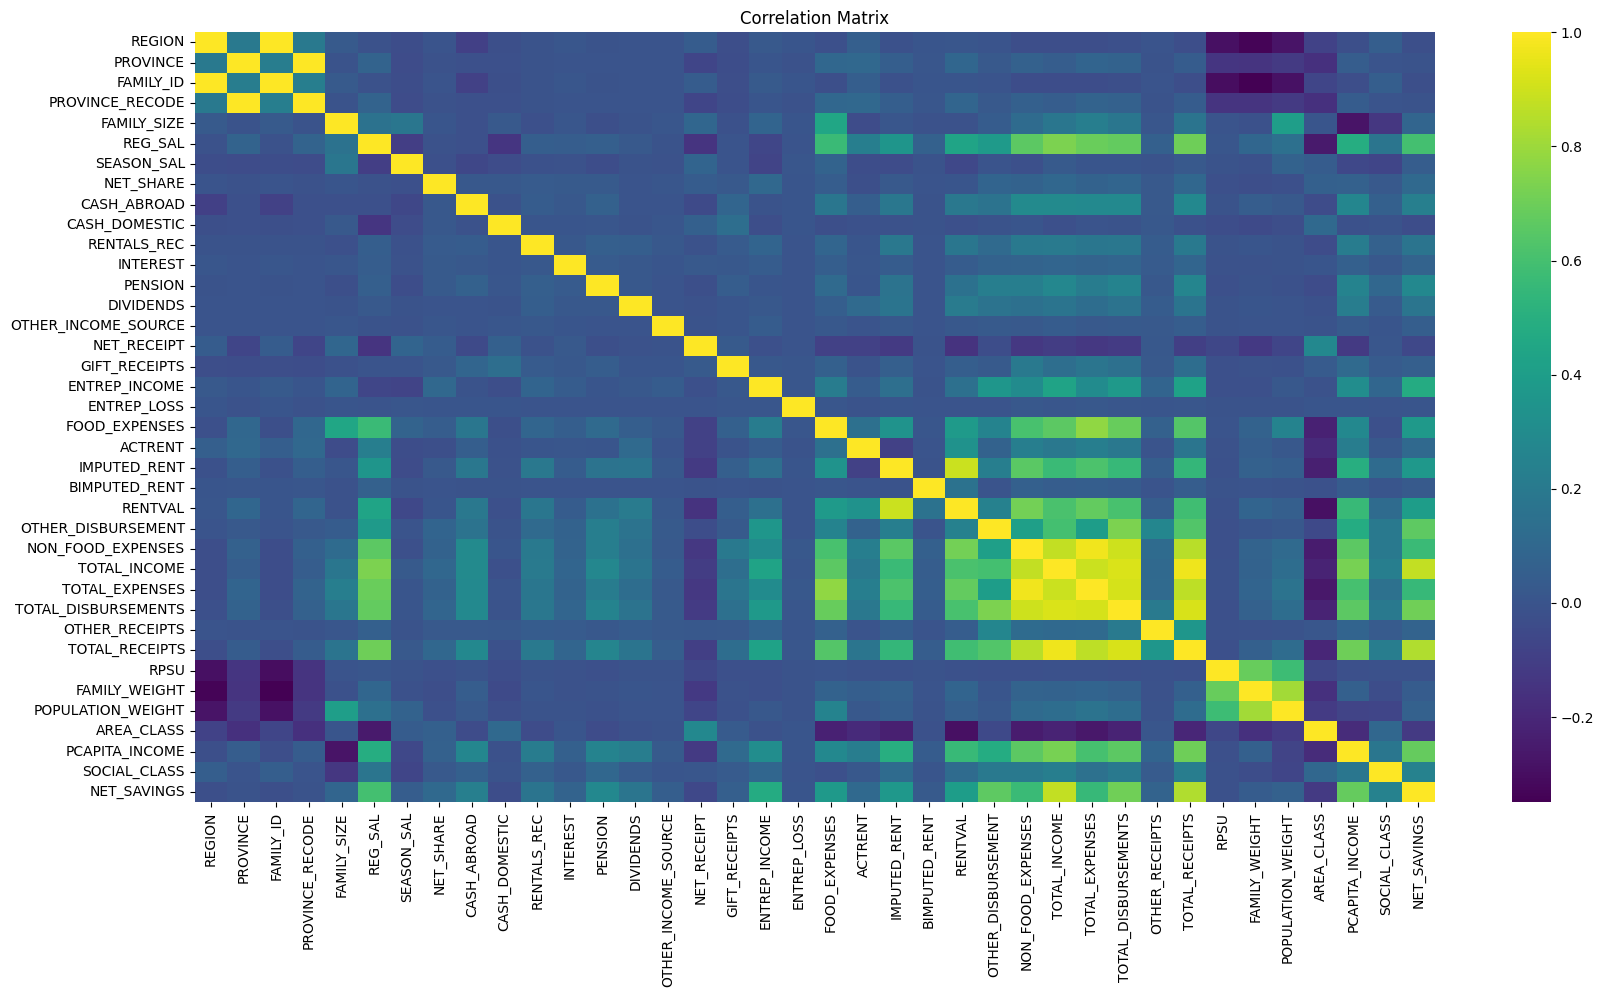

In [340]:
# Correction MAtrix
plt.figure(figsize=(20, 10))
sns.heatmap(cleaned_fies.corr(), cmap='viridis')
plt.title('Correlation Matrix')
plt.show()
